## Part A: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. The project objective is to understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.


In [29]:
#Loading the required packages
import numpy as np   
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

###### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [30]:
car1=pd.read_csv('Part1_Car-name.csv')

###### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [31]:
car2=pd.read_json ('Part1_Car-Attributes.json')

###### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [32]:
#concatinating with car names
car=pd.concat([car1,car2],axis=1)
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [33]:
row, column = car.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 9 columns


In [34]:
# replacing the categorical var with actual values
car['origin'] = car['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,america
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,america
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,america
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,america
4,ford torino,17.0,8,302.0,140,3449,10.5,70,america


###### Part 1.1 d - Print 5 point summary of the numerical features and share insights

In [35]:
#5-point summary
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


###### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [36]:
print('The data type of each attribute: \n')
car.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [37]:
car_missing = car.isna()
car_missing.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [38]:
car_num_missing = car_missing.sum()
car_num_missing

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [39]:
print('The data set has no missing values \n')
car.isnull().sum()

The data set has no missing values 



car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

###### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [40]:
dups = car.duplicated()
car[dups]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


###### There is no duplicate values.

###### Plot a pairplot for all features.

In [41]:
#checking for attribute type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


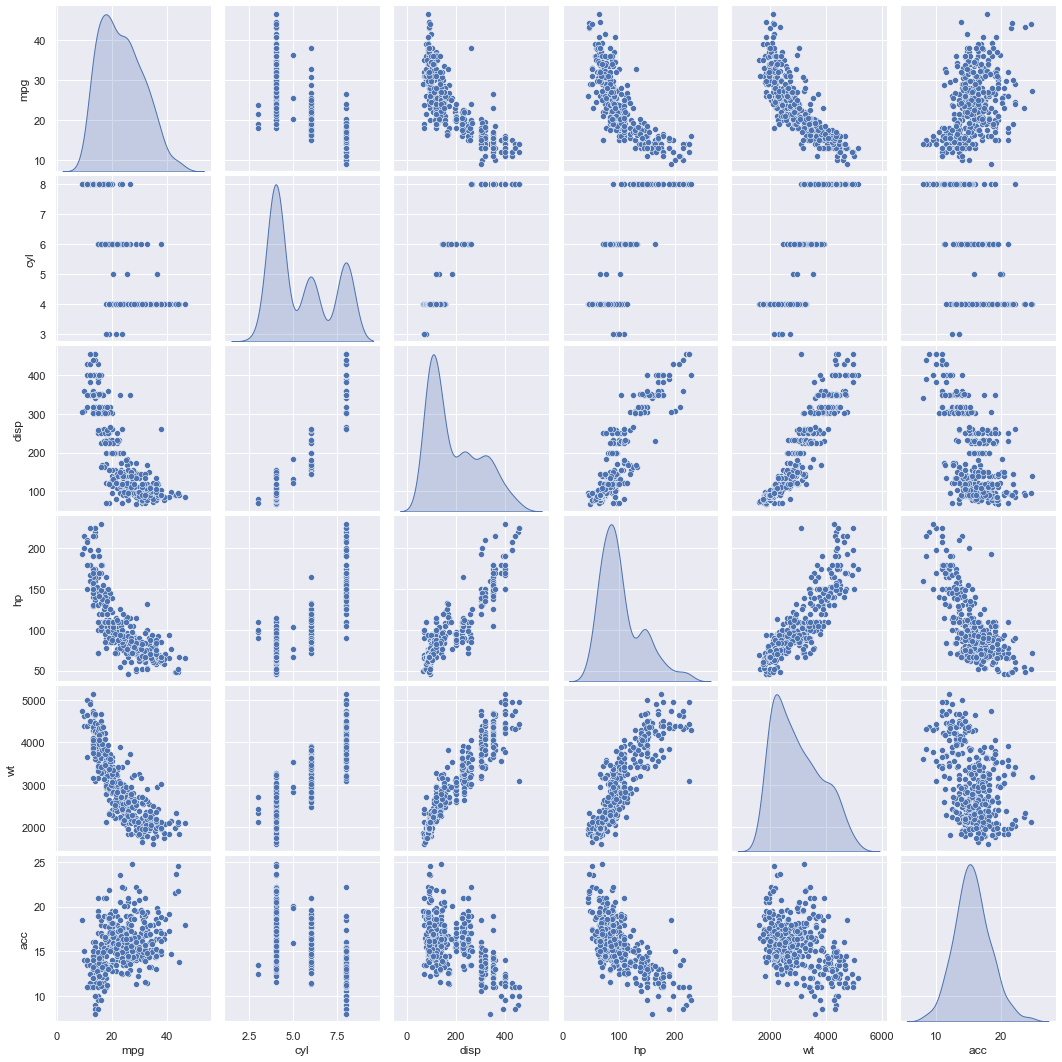

In [50]:
#pair plot for the numeric attributes
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

###### There appears to be a linear relationship between the variables

###### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

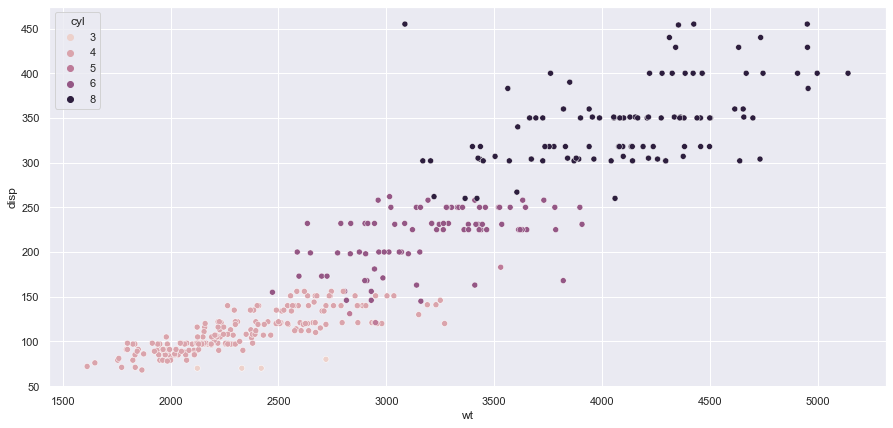

In [43]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='wt', y='disp',hue='cyl', data=car)
plt.show()

###### The variables appear to have a positive linear relationship. Displacement appears to be higher in heavier vehicles.

###### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

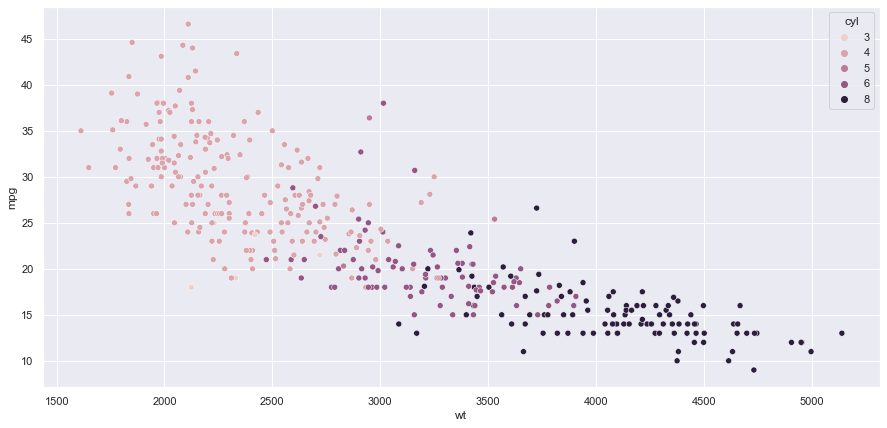

In [44]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='wt', y='mpg',hue='cyl', data=car)
plt.show()

###### The variables seem to be related in a negative linear manner. mpg seems to decline as the weight of the car increases.

###### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [45]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car.hp.str.isdigit()) 

#print isDigit = False!
car[hpIsDigit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,america
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,america
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,america
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,america


In [46]:
# Replace missing values with NaN
car = car.replace('?', np.nan)
car[hpIsDigit['hp'] == False] 

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,america
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,america
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,america
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,america


In [47]:
#replace the missing values with median value. 
car.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [48]:
#replace hp with median
car['hp'].fillna((car['hp'].median()), inplace=True)

In [49]:
print('The data set has no missing values \n')
car.isnull().sum()

The data set has no missing values 



car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

###### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

###### Part 1.3 b - Plot a visual and find elbow point.

###### Part 1.3 c - On the above visual, highlight which are the possible Elbow points. 

In [54]:
#separating numeric variables
cc = car.iloc[:,0:7] 
cc.head()

,car_name,mpg,cyl,disp,hp,wt,acc
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0
4,ford torino,17.0,8,302.0,140.0,3449,10.5


In [56]:
#dropping/ignoring car_name 
car = car.drop('car_name', axis=1)

In [57]:
#seperating the numeric values
cc = car.iloc[:,0:7] 
cc_z1 = cc.apply(zscore)
cc_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [60]:
#calculatint the within sum of squares
wss =[] 
for i in range(2,10):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[1294.8418950727319,
 946.0197908553793,
 738.393223592467,
 664.8890032028568,
 595.0994266849935,
 541.7612822418399,
 496.3409019787334,
 454.02173484592663]

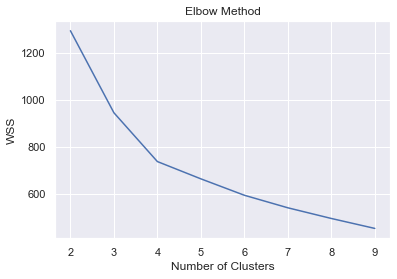

In [61]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(2,10), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [62]:
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

###### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value 

In [63]:
# Calculating silhouette_score
silhouette_score(cc_z1,labels)

0.4823594610391611

In [65]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)

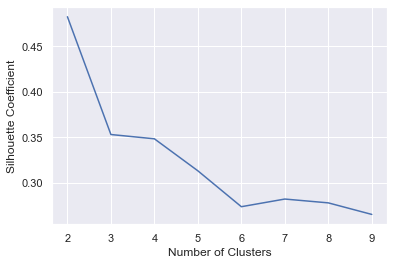

In [66]:
#plotting silhouette score for different centroids
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [68]:
carK=car.copy()

In [69]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
carK['cluster_K']=labels
Kclus=cc
Kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [70]:
#vieweing the distribution of clusters
cc.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [71]:
#attaching the clsuters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1


In [72]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,Freq
cluster_K,,,,,,,,
0,26.619113,4.569966,140.250853,85.061433,2567.860068,16.535836,76.822526,293
1,14.851429,7.923810,341.809524,158.000000,4093.771429,12.867619,73.742857,105


###### Clearly shows two distinct group with a difference in average between the clusters and variables

###### Part 1.3 f -Plot a visual and color the datapoints based upon clusters. 

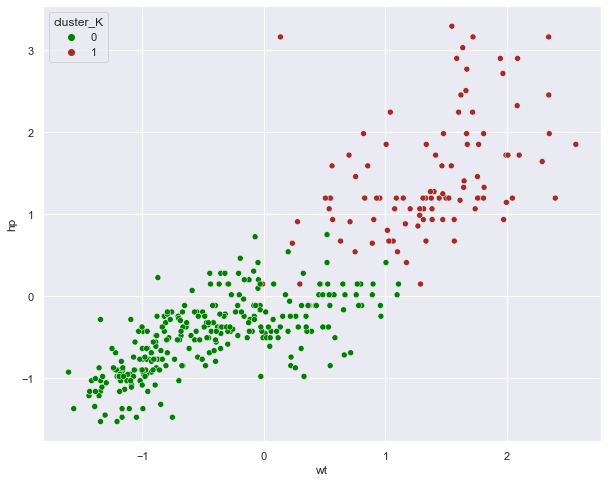

In [87]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="wt", y="hp", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','brown']);

In [74]:
carK.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [76]:
carK.shape

(398, 11)

In [77]:
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


###### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [78]:
#renaming the cluster labels to light and heavy vehicles and creating dummy variables of it
carK['cluster_K']=carK['cluster_K'].astype('category')
carK['cluster_K'] = carK['cluster_K'].replace({1: 'heavy', 0: 'light'})
carK = pd.get_dummies(carK, columns=['cluster_K'])

In [79]:
carK.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,cluster_K_light,cluster_K_heavy
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,0,1


In [80]:
X = carK.drop(['mpg','origin_europe','cluster_K_light'], axis=1)
# the dependent variable
y = carK[['mpg']]

In [81]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [82]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [83]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -1.1324817519639019
The coefficient for disp is 0.02409875069485255
The coefficient for hp is -0.024658927619770527
The coefficient for wt is -0.006813965139373553
The coefficient for acc is 0.20322746459446386
The coefficient for yr is 0.7951994745367832
The coefficient for origin_america is -2.662523373220874
The coefficient for origin_asia is 0.5010855231995756
The coefficient for cluster_K_heavy is 4.346501088998285


In [84]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -15.347429921922394


In [85]:
regression_model.score(X_train, y_train)

0.8243839439233268

In [86]:
K=regression_model.score(X_test, y_test)
K

0.8446778998175208

## Part B: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. The project objective is to apply dimensionality reduction technique – PCA and train a model and compare relative results.


In [213]:
#Loading the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

###### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [214]:
#import the dataset
ve = pd.read_csv('Part2_vehicle.csv')
ve.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


###### Part 2.1 b- Check percentage of missing values and impute with correct approach. 

In [215]:
#checking for the dimension of the data
rows, column = ve.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


In [216]:
#checking for the data type
print('The data type of each attribute: \n')
ve.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null  

In [217]:
print('Null values:\n', ve.isnull().sum())

Null values:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


###### There appears to be quite a few missing values

In [218]:
#replacing the missing values with median values
for cols in ve.columns:
    if(cols != 'class'): 
        ve[cols] = ve[cols].fillna(ve[cols].median())

In [219]:
#5-point summary
ve.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


###### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [220]:
ve_class = ve.groupby('class').agg('count')
print(ve_class)

       compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          218                   218           218   
car            429          429                   429           429   
van            199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     218                      218            218   
car                     429                      429            429   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     218                        218   
car              429                     429                   

In [221]:
#let’s import a few modules from ‘matplotlib’
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [222]:
ve_labels = ve_class.compactness.sort_values().index 
ve_class = ve_class.compactness.sort_values()

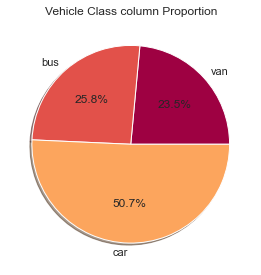

In [223]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 3)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Vehicle Class column Proportion')
type_show_ids = plt.pie(ve_class, labels=ve_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

###### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.  

In [224]:
print('Duplicated rows: ', ve[ve.duplicated()].shape[0])

Duplicated rows:  0


 ###### Part 2.2 b - Standardize the Data. 

In [225]:
#scaling the muerica variables
XScaled=X.apply(zscore)
XScaled.head()

,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,cluster_K_heavy
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0.773559,-0.497643,1.670472
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.773559,-0.497643,1.670472
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.773559,-0.497643,1.670472
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.773559,-0.497643,1.670472
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.773559,-0.497643,1.670472


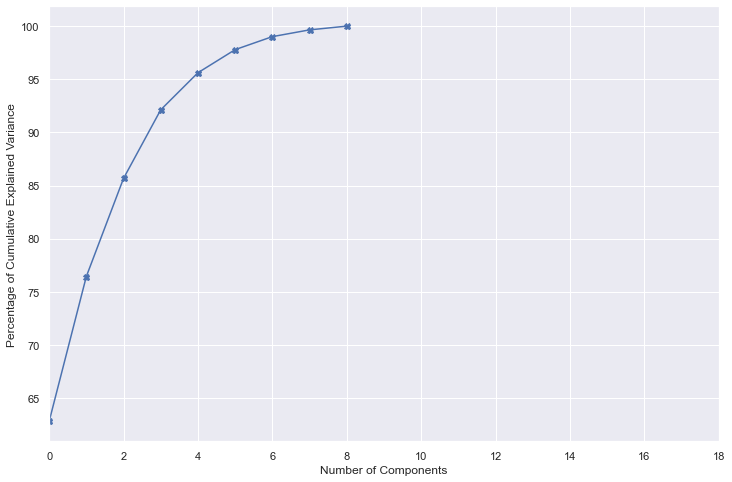

In [226]:
#plotting the cummulative variance explained by the principal componets
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

###### Part 2.2 a - Split data into X and Y.

In [227]:
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

###### Part 2.3 a - Train a base Classification model using SVM

In [228]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 278 rows and 9 columns.


In [229]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 120 rows and 9 columns.


In [230]:
print(pca.explained_variance_)

[5.6654741  1.23096479 0.83316032 0.58243753 0.31478298 0.19623886
 0.11044619 0.05742007 0.03174519]


In [231]:
#Using 6 components and printing the eigen vectors
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.39707891  0.40859866  0.3903695   0.3879825  -0.26278227 -0.18604016
   0.28615738 -0.2130346   0.37619338]
 [ 0.01263823 -0.00490117  0.20166537 -0.06061049 -0.42279096 -0.25925066
  -0.52103312  0.63721364  0.17886829]
 [-0.11961756 -0.09457572 -0.06467555 -0.13220538  0.08664555 -0.91906214
  -0.02929797 -0.30018376 -0.10924538]
 [ 0.23351617  0.15568467 -0.03020611  0.31704936  0.80394026 -0.12670737
  -0.20048243  0.32011715  0.12147791]
 [-0.01968285 -0.05640059  0.11533226  0.12933461  0.02300058  0.18098184
  -0.74532059 -0.59151667  0.16650637]
 [ 0.18425706 -0.1394488  -0.38749448 -0.43961653  0.05208763  0.0051206
   0.0766442  -0.04073955  0.77000995]]
[0.62791547 0.13643021 0.09234077 0.06455268 0.03488801 0.02174953]


In [232]:
#printing the original features and the reduced features
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 9
Reduced number of features: 6


In [233]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5
0,3.147046,0.659372,0.918393,-0.247433,-0.260147,0.875828
1,3.808073,0.905452,0.774772,-0.285942,-0.152968,0.355284
2,3.458941,0.922888,0.853689,-0.564198,-0.224430,0.674520
3,3.307224,0.770256,0.898331,-0.294359,-0.208955,0.713738
4,3.347573,0.946636,0.867400,-0.721279,-0.248164,0.781238


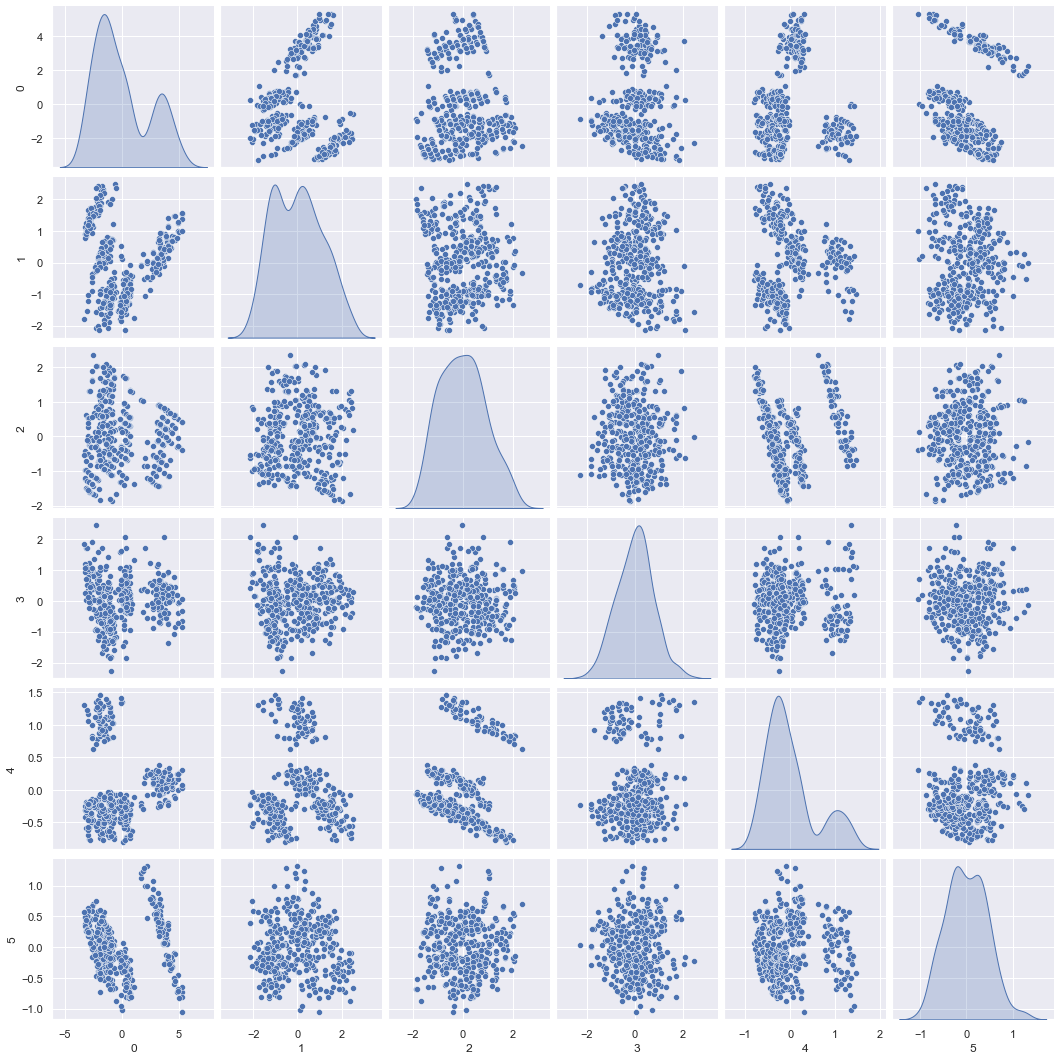

In [234]:
sns.pairplot(pca_df, diag_kind = 'kde');

In [235]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [236]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 278 rows and 6 columns.


In [237]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 120 rows and 6 columns.
